# Feature Scaling - Traffic Accidents

This notebook explores **2 approaches** to scale numeric features:
1. **StandardScaler** - Standardize features to zero mean and unit variance
2. **MinMaxScaler** - Scale features to a fixed range [0, 1]

Each approach is evaluated using Naive Bayes and KNN classifiers.

In [1]:
import sys
import numpy as np
from pandas import read_csv, DataFrame, Series, concat
from matplotlib.pyplot import figure, savefig, show
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sys.path.insert(1, '../../../../utils')
from dslabs_functions import get_variable_types, read_train_test_from_files
from studies import evaluate_and_plot, run_all_nb

In [2]:
def get_unique(a):
    unique = []
    for sub_a in a: 
        if not any([np.array_equal(i, sub_a) for i in unique]): 
            unique.append(sub_a)
    return unique

In [3]:
file_tag = "traffic"
metric="f1"
lab_folder_sca = "lab3_preparation/scaling"
target_name = "crash_type"

# Use best result from outliers step
train_filename = "../../data/prepared/traffic_best_out_train.csv"
test_filename = "../../data/prepared/traffic_best_out_test.csv"

data_train: DataFrame = read_csv(train_filename, na_values="")
data_test: DataFrame = read_csv(test_filename, na_values="")
variable_types: dict[str, list] = get_variable_types(concat([data_train, data_test]))
numeric_vars = variable_types['numeric']

input_df: DataFrame = concat([data_train, data_test])

print(f"Train dataset shape: {data_train.shape}")
print(f"Test dataset shape: {data_test.shape}")
print(f"Concat dataset shape: {input_df.shape}")
print(f"Numeric variables: {len(numeric_vars)}")

Train dataset shape: (146514, 150)
Test dataset shape: (62792, 150)
Concat dataset shape: (209306, 150)
Numeric variables: 13


In [4]:
unique_array = np.array(get_unique((input_df.iloc[:146514,:] == data_train).values)[0])
unique_array = get_unique(unique_array)
print(unique_array)

[np.True_]


In [5]:
unique_array = np.array(get_unique((input_df.iloc[146514:,:] == data_test).values)[0])
unique_array = get_unique(unique_array)
print(unique_array)

[np.True_]


## Approach 1: StandardScaler

Standardize features by removing the mean and scaling to unit variance.

Formula: `z = (x - mean) / std_dev`

In [6]:
approach_sca1 = "Standard-Scaler"

data_sca1 = input_df.copy()
target: Series = data_sca1.pop(target_name)

# Scale numeric features
numeric_df = data_sca1[numeric_vars].copy()
transf: StandardScaler = StandardScaler(with_mean=True, with_std=True, copy=True).fit(numeric_df)
numeric_df_scaled = DataFrame(transf.transform(numeric_df), index=data_sca1.index)
data_sca1[numeric_vars] = numeric_df_scaled
data_sca1[target_name] = target

print(f"Scaled data shape: {data_sca1.shape}")
print("\nScaled numeric features statistics:")
print(data_sca1[numeric_vars].describe())

Scaled data shape: (209306, 150)

Scaled numeric features statistics:
         crash_date        damage     num_units  most_severe_injury  \
count  2.093060e+05  2.093060e+05  2.093060e+05        2.093060e+05   
mean  -2.382032e-15 -1.516777e-16  4.405714e-16        6.599405e-17   
std    1.000002e+00  1.000002e+00  1.000002e+00        1.000002e+00   
min   -3.212990e+00 -2.425352e+00 -2.865974e+00       -5.496000e-01   
25%   -8.340809e-01 -9.137786e-01 -1.621893e-01       -5.496000e-01   
50%    1.213610e-02  5.977945e-01 -1.621893e-01       -5.496000e-01   
75%    8.607866e-01  5.977945e-01 -1.621893e-01        5.981633e-01   
max    1.699802e+00  5.977945e-01  2.146809e+01        4.041453e+00   

       injuries_total  injuries_fatal  injuries_incapacitating  \
count    2.093060e+05    2.093060e+05             2.093060e+05   
mean    -4.236655e-17   -4.345287e-18             5.322977e-17   
std      1.000002e+00    1.000002e+00             1.000002e+00   
min     -4.918281e-01   -2

## Approach 2: MinMaxScaler

Transform features by scaling each feature to the range [0, 1].

Formula: `x_scaled = (x - x_min) / (x_max - x_min)`

In [7]:
approach_sca2 = "MinMax-Scaler"

data_sca2 = input_df.copy()
target: Series = data_sca2.pop(target_name)

# Scale numeric features
numeric_df = data_sca2[numeric_vars].copy()
transf: MinMaxScaler = MinMaxScaler(feature_range=(0, 1), copy=True).fit(numeric_df)
numeric_df_scaled = DataFrame(transf.transform(numeric_df), index=data_sca2.index)
data_sca2[numeric_vars] = numeric_df_scaled
data_sca2[target_name] = target

print(f"Scaled data shape: {data_sca2.shape}")
print("\nScaled numeric features statistics:")
print(data_sca2[numeric_vars].describe())

Scaled data shape: (209306, 150)

Scaled numeric features statistics:
          crash_date         damage      num_units  most_severe_injury  \
count  209306.000000  209306.000000  209306.000000       209306.000000   
mean        0.654005       0.802261       0.117776            0.119711   
std         0.203551       0.330782       0.041095            0.217815   
min         0.000000       0.000000       0.000000            0.000000   
25%         0.484227       0.500000       0.111111            0.000000   
50%         0.656475       1.000000       0.111111            0.000000   
75%         0.829218       1.000000       0.111111            0.250000   
max         1.000000       1.000000       1.000000            1.000000   

       injuries_total  injuries_fatal  injuries_incapacitating  \
count   209306.000000   209306.000000            209306.000000   
mean         0.018024        0.000284                 0.005744   
std          0.036648        0.009563                 0.033507   

In [8]:
data_sca1_train = data_sca1.iloc[:146514,:]
data_sca2_train = data_sca2.iloc[:146514,:]
data_sca1_test = data_sca1.iloc[146514:,:]
data_sca2_test = data_sca2.iloc[146514:,:]

## Evaluate

Couldn't run MultinomialNB


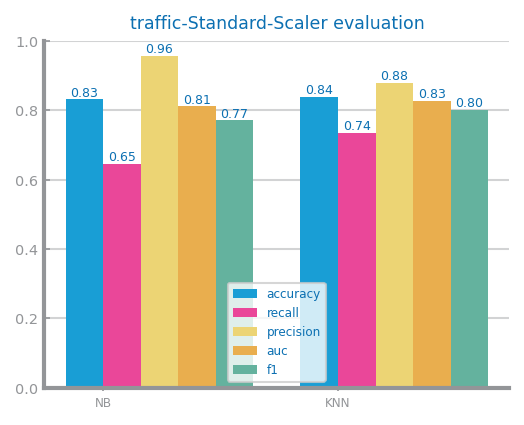

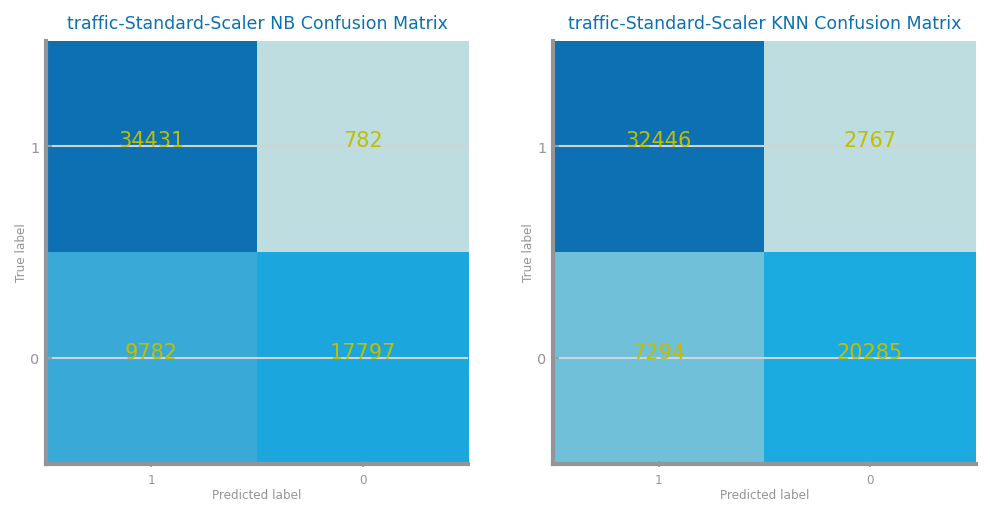

In [9]:
evaluate_and_plot(data_sca1_train, data_sca1_test, lab_folder_sca, file_tag, approach_sca1, target_name, metric=metric)

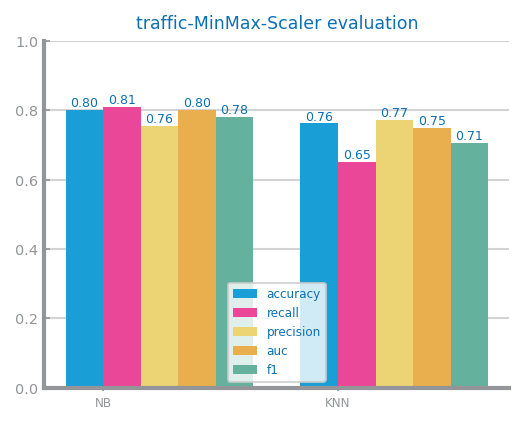

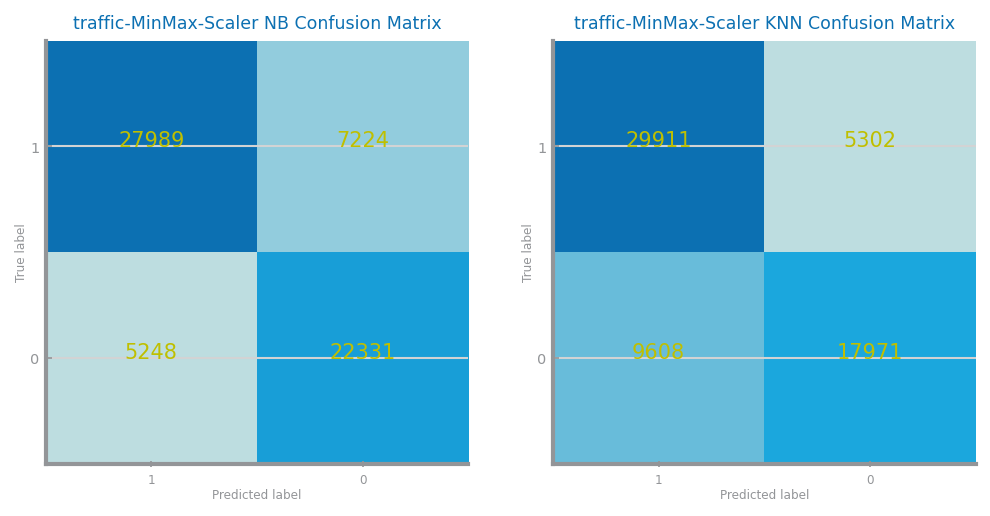

In [10]:
evaluate_and_plot(data_sca2_train, data_sca2_test, lab_folder_sca, file_tag, approach_sca2, target_name, metric=metric)

## Save Best Result

Based on evaluation metrics, save the best performing approach.

In [11]:
# Uncomment to save individual results
data_sca1_train.to_csv(f"../../data/prepared/{file_tag}_scaling_{approach_sca1}_train.csv", index=False)
data_sca1_test.to_csv(f"../../data/prepared/{file_tag}_scaling_{approach_sca1}_test.csv", index=False)
data_sca2_train.to_csv(f"../../data/prepared/{file_tag}_scaling_{approach_sca2}_train.csv", index=False)
data_sca2_test.to_csv(f"../../data/prepared/{file_tag}_scaling_{approach_sca2}_test.csv", index=False)

# approach 1 was best knn
best_df_sca_train = data_sca1_train.copy()
best_df_sca_test = data_sca1_test.copy()
best_approach_sca = approach_sca1
best_df_sca_train.to_csv(f"../../data/prepared/traffic_best_sca_train.csv", index=False)
best_df_sca_test.to_csv(f"../../data/prepared/traffic_best_sca_test.csv", index=False)
print(f"Best approach: {best_approach_sca}")
print(f"Shape: {best_df_sca_train.shape} {best_df_sca_test.shape}")

Best approach: Standard-Scaler
Shape: (146514, 150) (62792, 150)


#### **Deeper analysis**

**NAIVE BAYES ANALYSIS - TRAFFIC DATA**

In [12]:
train_filename_1 = f"../../data/prepared/{file_tag}_scaling_{approach_sca1}_train.csv"
train_filename_2 = f"../../data/prepared/{file_tag}_scaling_{approach_sca2}_train.csv"
test_filename_1 = f"../../data/prepared/{file_tag}_scaling_{approach_sca1}_test.csv"
test_filename_2 = f"../../data/prepared/{file_tag}_scaling_{approach_sca2}_test.csv"

In [13]:
# train/test splitting
features_train_sca1, features_test_sca1, target_train_sca1, target_test_sca1, labels, vars = read_train_test_from_files(train_filename_1, test_filename_1, target_name)
features_train_sca2, features_test_sca2, target_train_sca2, target_test_sca2, labels, vars = read_train_test_from_files(train_filename_2, test_filename_2, target_name)

Couldn't run MultinomialNB


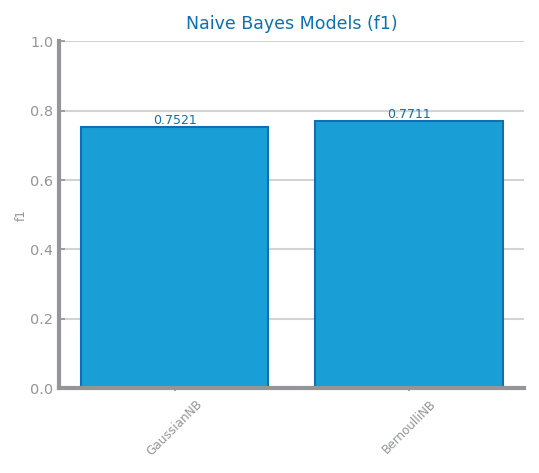

<Figure size 600x450 with 0 Axes>

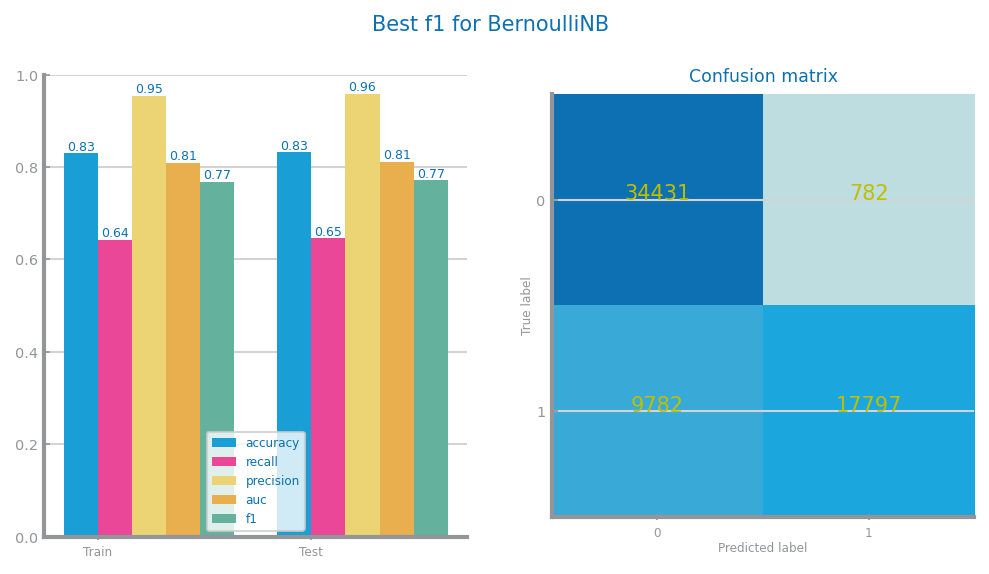

In [14]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    nb_best_model, nb_params = run_all_nb(
        features_train_sca1, target_train_sca1, features_test_sca1, target_test_sca1, 
        lab_folder_sca, file_tag, approach_sca1,
        eval_metric = el
    )

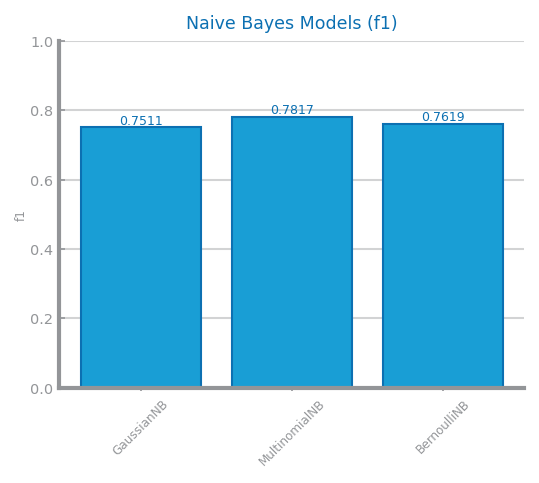

<Figure size 600x450 with 0 Axes>

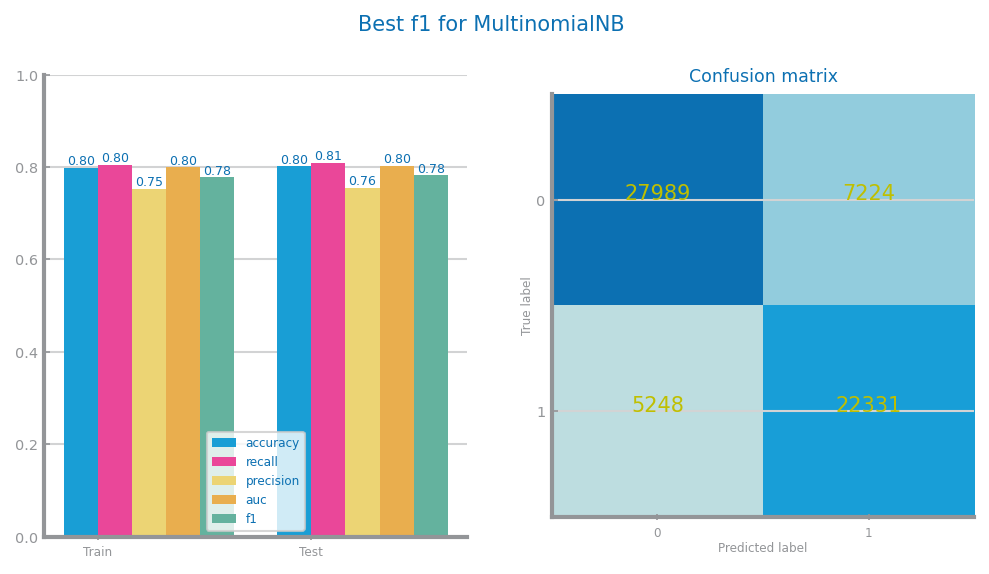

In [15]:
metrics = [#"accuracy", "recall", 
    "f1"] 
for el in metrics:
    nb_best_model, nb_params = run_all_nb(
        features_train_sca2, target_train_sca2, features_test_sca2, target_test_sca2, 
        lab_folder_sca, file_tag, approach_sca2,
        eval_metric = el
    )